In [69]:
import pandas as pd

In [70]:
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [71]:
df.shape

(891, 12)

In [72]:
df.columns

Index(['PassengerId', 'Name', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived'],
      dtype='object')

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Name         891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Survived     891 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [74]:
df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208,0.383838
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429,0.486592
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [75]:
df.isna().sum()

PassengerId      0
Name             0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Survived         0
dtype: int64

In [94]:
df.columns[df.isna().any()]

Index(['Age', 'Cabin', 'Embarked'], dtype='object')

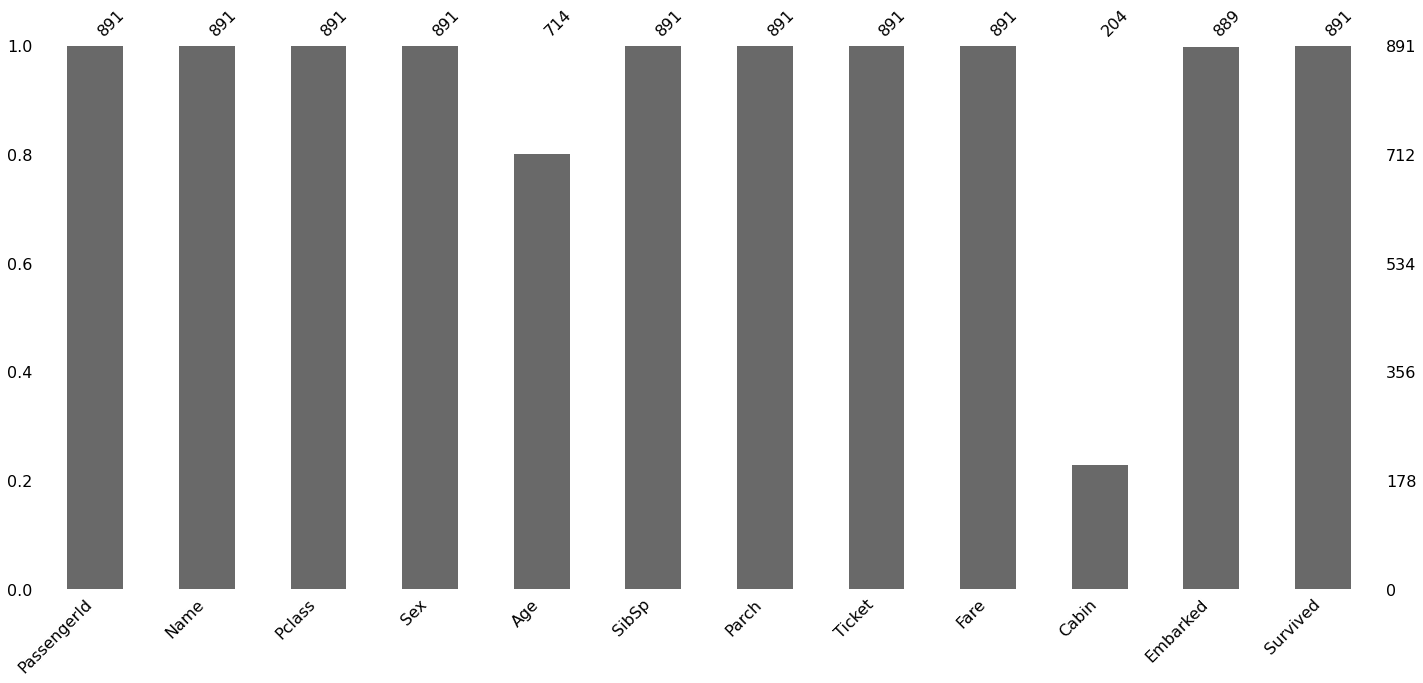

In [76]:
import missingno as msno
p=msno.bar(df)

In [33]:
df.duplicated().sum()

0

In [34]:
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns',inplace=True)
df.head()

,Pclass,Sex,Age,Fare,Survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0


In [35]:
inputs = df.drop('Survived',axis='columns')
target = df.Survived

In [36]:
inputs

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500
...,...,...,...,...
886,2,male,27.0,13.0000
887,1,female,19.0,30.0000
888,3,female,NaN,23.4500
889,1,male,26.0,30.0000


In [37]:
dummies = pd.get_dummies(inputs.Sex)
dummies.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [38]:
inputs = pd.concat([inputs,dummies],axis='columns')
inputs.head()

,Pclass,Sex,Age,Fare,female,male
0,3,male,22.0,7.2500,0,1
1,1,female,38.0,71.2833,1,0
2,3,female,26.0,7.9250,1,0
3,1,female,35.0,53.1000,1,0
4,3,male,35.0,8.0500,0,1


# dropping male column as well because of dummy variable trap theory. One column is enough to repressent male or female

In [39]:
inputs.drop(['Sex','male'],axis='columns',inplace=True)
inputs.head()

,Pclass,Age,Fare,female
0,3,22.0,7.2500,0
1,1,38.0,71.2833,1
2,3,26.0,7.9250,1
3,1,35.0,53.1000,1
4,3,35.0,8.0500,0


In [40]:
inputs.isna().sum()

Pclass      0
Age       177
Fare        0
female      0
dtype: int64

In [41]:
# OR
inputs.columns[inputs.isna().any()]

Index(['Age'], dtype='object')

In [42]:
inputs.Age[:20]

0     22.0
1     38.0
2     26.0
3     35.0
4     35.0
5      NaN
6     54.0
7      2.0
8     27.0
9     14.0
10     4.0
11    58.0
12    20.0
13    39.0
14    14.0
15    55.0
16     2.0
17     NaN
18    31.0
19     NaN
Name: Age, dtype: float64

In [43]:
# NAN to Change IN MEAN()

inputs.Age = inputs.Age.fillna(inputs.Age.mean())
inputs.head()

,Pclass,Age,Fare,female
0,3,22.0,7.2500,0
1,1,38.0,71.2833,1
2,3,26.0,7.9250,1
3,1,35.0,53.1000,1
4,3,35.0,8.0500,0


In [44]:
inputs.isna().sum()

Pclass    0
Age       0
Fare      0
female    0
dtype: int64

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs,target,test_size=0.4,random_state=42)

In [58]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [59]:
model.fit(X_train,y_train)

GaussianNB()

In [60]:
model.score(X_test,y_test)

0.773109243697479

In [61]:
X_test[0:10]

,Pclass,Age,Fare,female
709,3,29.699118,15.2458,0
439,2,31.000000,10.5000,0
840,3,20.000000,7.9250,0
720,2,6.000000,33.0000,1
39,3,14.000000,11.2417,1
290,1,26.000000,78.8500,1
300,3,29.699118,7.7500,1
333,3,16.000000,18.0000,0
208,3,16.000000,7.7500,1
136,1,19.000000,26.2833,1


In [90]:
y_test[0:10]

709    1
439    0
840    0
720    1
39     1
290    1
300    1
333    0
208    1
136    1
Name: Survived, dtype: int64

In [91]:
model.predict(X_test[0:10])

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1], dtype=int64)

In [92]:
model.predict_proba(X_test[:10])

array([[0.97197175, 0.02802825],
       [0.94162883, 0.05837117],
       [0.96544177, 0.03455823],
       [0.13859266, 0.86140734],
       [0.34374008, 0.65625992],
       [0.02014129, 0.97985871],
       [0.42500789, 0.57499211],
       [0.96259383, 0.03740617],
       [0.35399577, 0.64600423],
       [0.07557054, 0.92442946]])

# Calculate the score using cross validation

In [93]:
from sklearn.model_selection import cross_val_score
cross_val_score(GaussianNB(),X_train, y_train, cv=5)

array([0.86915888, 0.76635514, 0.70093458, 0.71028037, 0.8490566 ])

In [80]:
from sklearn.naive_bayes import MultinomialNB

In [81]:
mnb=MultinomialNB()

In [82]:
mnb.fit(X_train ,y_train)

MultinomialNB()

In [83]:
y_pred = mnb.predict(X_train)

In [85]:
y_pred

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,

In [86]:
y_test.head() ,y_pred[0:5]

(709    1
 439    0
 840    0
 720    1
 39     1
 Name: Survived, dtype: int64,
 array([0, 1, 1, 0, 0], dtype=int64))

In [87]:
from sklearn.metrics import confusion_matrix

In [89]:
confusion_matrix(y_test,y_pred)

ValueError: Found input variables with inconsistent numbers of samples: [357, 534]